In [6]:
import cv2
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import os

variant = ord("E") % 5 + 1
print(variant)


5


In [7]:
file_path = r"D:\py\Lab6.xlsx"
data = pd.read_excel(file_path)
data_for_variant = data.iloc[variant - 1]
data_for_variant


N                             5
file name        ron_wesley.jpg
image size              500x500
glasses color            yellow
line width                    6
Name: 4, dtype: object

In [8]:
def add_glasses_to_image(image_path, output_path, glasses_color=(0, 255, 0), line_thickness=4):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    
    img = cv2.imread(image_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    if len(faces) == 0:
        return
    
    x, y, w, h = faces[0]
    face_region = gray_img[y:y+h, x:x+w]
    upper_half = face_region[:h//2, :]
    eyes = eye_cascade.detectMultiScale(upper_half, scaleFactor=1.1, minNeighbors=5, minSize=(15, 15))
    
    if len(eyes) < 2:
        return
    
    eyes = sorted(eyes, key=lambda eye: eye[0])
    
    left_eye_center = (x + eyes[0][0] + eyes[0][2] // 2, y + eyes[0][1] + eyes[0][3] // 2)
    right_eye_center = (x + eyes[1][0] + eyes[1][2] // 2, y + eyes[1][1] + eyes[1][3] // 2)
    left_eye_radius = max(eyes[0][2], eyes[0][3]) // 2
    right_eye_radius = max(eyes[1][2], eyes[1][3]) // 2
    
    img_copy = img.copy()
    
    cv2.circle(img_copy, left_eye_center, left_eye_radius, glasses_color, line_thickness)
    cv2.circle(img_copy, right_eye_center, right_eye_radius, glasses_color, line_thickness)
    
    left_edge = (left_eye_center[0] + left_eye_radius, left_eye_center[1])
    right_edge = (right_eye_center[0] - right_eye_radius, right_eye_center[1])
    cv2.line(img_copy, left_edge, right_edge, glasses_color, line_thickness)
    
    left_side = (left_eye_center[0] - left_eye_radius - 30, left_eye_center[1])
    right_side = (right_eye_center[0] + right_eye_radius + 30, right_eye_center[1])
    cv2.line(img_copy, (left_eye_center[0] - left_eye_radius, left_eye_center[1]), left_side, glasses_color, line_thickness)
    cv2.line(img_copy, (right_eye_center[0] + right_eye_radius, right_eye_center[1]), right_side, glasses_color, line_thickness)
    
    resized_image = cv2.resize(img_copy, (300, 300))
    cv2.imwrite(output_path, resized_image)


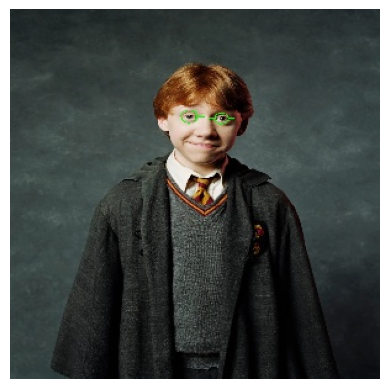

In [9]:
image_path = r"D:\py\Images\ron_wesley.jpg"
output_file = r"D:\py\output.jpg"
add_glasses_to_image(image_path, output_file)

result = Image.open(output_file)
plt.imshow(result)
plt.axis('off')
plt.show()


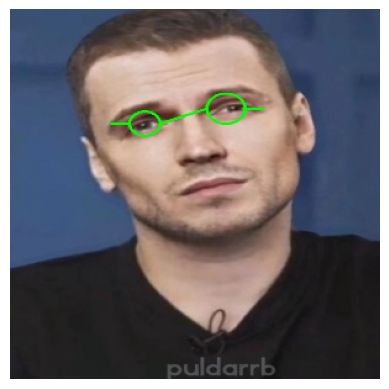

In [10]:
image_path = r"D:\py\Images\papizi.webp"
output_file = r"D:\py\output1.jpg"
add_glasses_to_image(image_path, output_file)

result = Image.open(output_file)
plt.imshow(result)
plt.axis('off')
plt.show()
